## Imports

In [1]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
sns.set()

## Load Data

In [2]:
# use this to train and VALIDATE your solution
train_df = pd.read_csv("../nlp_deliv1_materials/quora_train_data.csv")

In [3]:
A_df, te_df = model_selection.train_test_split(train_df, test_size=0.05, random_state=123)
tr_df, va_df = model_selection.train_test_split(A_df, test_size=0.05, random_state=123)
print('tr_df.shape=',tr_df.shape)

tr_df.shape= (291897, 6)


In [4]:
tr_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
61482,125898,203030,203031,Is Java or C++ or C the most popular language ...,How do I develop a software which will have a ...,0
131546,36249,66113,66114,How do you convert direct speech into reported...,I feel weak at spoken English. I have sentence...,0
22927,199864,301469,301470,Where can I buy used wine barrels?,Where can you buy used wine barrels?,1
183520,277339,17728,138400,What was the best day of your life? (Excluding...,What is the Best Day of your life till date?,1
67694,392907,525647,525648,How is web-work.in works?,How do I get web designing work?,0


In [5]:
va_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
146205,378301,509685,56699,"Who is more dishonest, Donald Trump or Hillary...",Would you rather vote for Donald Trump or Hill...,0
99373,332237,459221,303879,What are the healthiest foods to eat for dinner?,Which is the healthiest food?,0
292307,283851,100550,99720,Can a dog take baby aspirin?,Is it safe to give my dog a baby aspirin and h...,1
73776,306170,87025,429632,What is churchofsatan.com?,What is Loadteam.com?,0
256938,24445,14806,12515,Why MS Dhoni left captaincy though he was a su...,Why does M.S Dhoni left captaincy for ODI and ...,1


In [6]:
te_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
164818,255753,370719,370720,What is it like to travel in Afghanistan?,What is it like for a foreigner to travel in A...,0
55016,154975,242877,170732,Do rappers really make as much money as they c...,Can I make money from lyrics videos on YouTube?,0
270232,203596,306264,306265,Did Mary give a natural vaginal birth to Jesus...,How is the labour of Mary and her birth giving...,0
204802,24276,45379,45380,How can you determine the Lewis structure for O2?,How is the Lewis structure for propane determi...,0
286997,354727,483878,483879,Where does Plex get poster art/thumbnails for ...,Who designed the UX and UI of Plex media center?,0


In [7]:
y_train = tr_df['is_duplicate']
y_val = va_df['is_duplicate']
y_test = te_df['is_duplicate']

## Analysis of the data

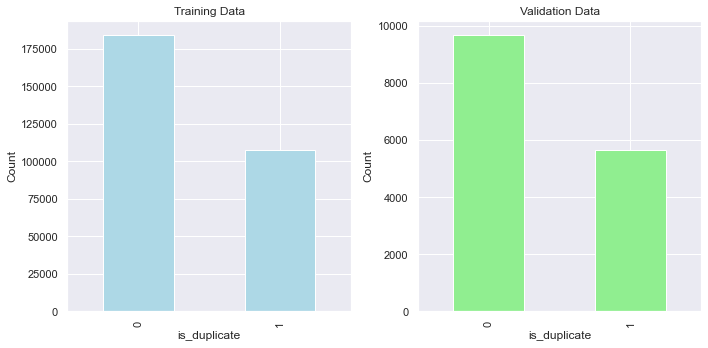

In [7]:
# Group by 'is_duplicate' and count the number of IDs for training and validation data
tr_counts = tr_df.groupby('is_duplicate')['id'].count()
va_counts = va_df.groupby('is_duplicate')['id'].count()

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot training data counts
tr_counts.plot(kind='bar', ax=axs[0], color='lightblue')
axs[0].set_title('Training Data')

# Plot validation data counts
va_counts.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Validation Data')

# Set common labels
for ax in axs:
    ax.set_xlabel('is_duplicate')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
qids = pd.Series(tr_df['qid1'].to_list() + tr_df['qid2'].to_list())
num_unique_questions = len(np.unique(qids))
non_unique_questions = np.sum(qids.value_counts() > 1)
percentage_non_unique_questions = ( non_unique_questions / num_unique_questions ) * 100

print("Statistics on Question IDs \n","---"*35)
print(f"Number of Unique Questions: {num_unique_questions}")
print(f"Number of Non-Unique Questions: {non_unique_questions}")
print(f"Percentage of Non-Unique Questions: {percentage_non_unique_questions:.2f}%")
print(f"Maximum Times a Question Got Repeated: {qids.value_counts().iloc[0]}")

Statistics on Question IDs 
 ---------------------------------------------------------------------------------------------------------
Number of Unique Questions: 414213
Number of Non-Unique Questions: 75805
Percentage of Non-Unique Questions: 18.30%
Maximum Times a Question Got Repeated: 125


In [9]:
pair_duplicates = tr_df[['qid1', 'qid2', 'is_duplicate']].groupby(['qid1', 'qid2']).count().reset_index()
num_duplicated_questions = pair_duplicates.shape[0] - tr_df.shape[0]
print(f"Number of duplicated questions: {num_duplicated_questions}")

Number of duplicated questions: 0


## TF-IDF
Is a measure that can be used to build feature vectors. It measures the importance of a word to a document corpus.

**TF**: *term frequency*,  emphasizes words taht appear frequently in a geiven document.

**IDF**: *inverse document frequency*, empasizes words that appear rarely in a set of documents.


In [8]:
# preprocessing
# filling Nan values as ''

tr_df_clean = tr_df.fillna('')
va_df_clean = va_df.fillna('')
te_df_clean = te_df.fillna('')

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

questions = list(tr_df_clean['question1']) + list(tr_df_clean['question2'])
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit(questions)

In [10]:
from utils import get_features_from_df
X_tr_q1q2 = get_features_from_df(tr_df_clean, tfidf) # it converts list as strings
X_va_q1q2 = get_features_from_df(va_df_clean, tfidf) # it converts list as strings
X_te_q1q2 = get_features_from_df(te_df_clean, tfidf) # it converts list as strings

/Users/claudiavalverde/Documents/DS-master/semestre2/NLP/project1/quora-challenge/utils.py:391: SyntaxWarning: invalid escape sequence '\w'
  """


In [11]:
# training a simple model
logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
logistic.fit(X_tr_q1q2, y_train)

LogisticRegression(random_state=123, solver='liblinear')

### Training simple model with TF-IDF features only

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7944857261294224, 'roc_auc': 0.7586104607538344, 'precision': 0.7759680037097149, 'recall': 0.6220782721029006, 'f1': 0.6905534434821184}

 VALIDAITON METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7561023237648896, 'roc_auc': 0.7185294793375581, 'precision': 0.7086956521739131, 'recall': 0.575260278807129, 'f1': 0.6350443167429629}

 TEST 
METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7619960425426663
F1:  0.6441712119811408
Precision:  0.7243243243243244
Recall:  0.5799900116530714
ROC AUC:  0.7247711986450305

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.78      0.87      0.82    

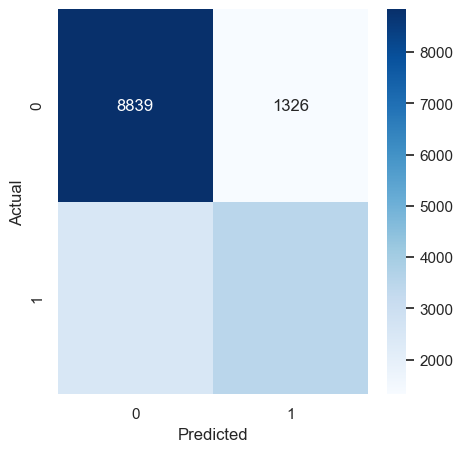

In [12]:
from utils import evaluate_model
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(X_tr_q1q2, y_train, model=logistic, display=False)
print(train_model)
print('\n','VALIDAITON METRICS:','\n', '---'*30)
valid_model = evaluate_model(X_va_q1q2, y_val, model=logistic, display=False)
print(valid_model)
print('\n','TEST ')
test_model = evaluate_model(X_te_q1q2, y_test, model=logistic, display=True)

## Edit Distance
Our implementation returns 1 column (feature) for the distance between the pair of questions.

In [13]:
%load_ext Cython

In [14]:
%%cython --annotate
cimport numpy as np
import numpy as np
def cy_create_memoization_table(str X, str Y):
    cdef int i, j, del_char, ins_char, sub_char, Z
    cdef int len_x = len(X)
    cdef int len_y = len(Y)
    cdef int [:, :] D =  np.zeros((len_x + 1, len_y + 1), dtype=np.int32)

    for i in range(len_x+1):
        D[i,0] = i

    for j in range(len_y+1):
        D[0,j] = j

    for i in range(1, len_x + 1):
        for j in range(1, len_y + 1):
            del_char = D[i-1,j] + 1
            ins_char = D[i,j-1] + 1

            if X[i-1] == Y[j-1]:
                Z = 0
            else:
                Z = 1
            sub_char = D[i-1,j-1] + Z

            D[i,j] = min(del_char, ins_char, sub_char)
    
    return D

In [15]:
# eucledian distance
def edit_distance(x,y):
    return cy_create_memoization_table(x,y)[-1,-1]

In [16]:
# edit distance only works for str type
edit_distances_tr = tr_df.apply(lambda row: edit_distance(str(row['question1']), str(row['question2'])), axis=1)
edit_distances_va = va_df.apply(lambda row: edit_distance(str(row['question1']), str(row['question2'])), axis=1)
edit_distances_te = te_df.apply(lambda row: edit_distance(str(row['question1']), str(row['question2'])), axis=1)

In [84]:
# saving features for further use in other approaches
dist_df_train = pd.DataFrame({'Edit_Train':edit_distances_tr})
dist_df_val = pd.DataFrame({'Edit_Validation':edit_distances_va})
dist_df_test = pd.DataFrame({'Edit_Test': edit_distances_te})

## Jaccard Similarity 
also known as Jaccard index, is a statistic to measure the similarity between two data sets. It is measured as the size of the intersection of two sets divided by the size of their union. Jaccard similarity can be used in natural language processing to compare texts, text samples, or even individual words.


In [17]:
# Define a function to compute Jaccard similarity between two strings
def jaccard_similarity(s1, s2):
    set1 = set(str(s1).lower().split())  # Convert string to set of lowercase words
    set2 = set(str(s2).lower().split())  # Convert string to set of lowercase words
    intersection = len(set1.intersection(set2))  # Compute intersection
    union = len(set1.union(set2))  # Compute union
    return intersection / union if union != 0 else 0  # Compute Jaccard similarity

In [77]:
from utils import jaccard_similarity
jaccard_similarity_tr = tr_df.apply(lambda row: jaccard_similarity(row['question1'], row['question2']), axis=1)
jaccard_similarity_va = va_df.apply(lambda row: jaccard_similarity(row['question1'], row['question2']), axis=1)
jaccard_similarity_te = te_df.apply(lambda row: jaccard_similarity(row['question1'], row['question2']), axis=1)

In [86]:
# saving features for further use in other approaches
dist_df_train = dist_df_train.merge(pd.DataFrame({'Jaccard_Train':jaccard_similarity_tr}),left_index=True, right_index=True)
dist_df_val = dist_df_val.merge(pd.DataFrame({'Jaccard_Validation':jaccard_similarity_va}),left_index=True, right_index=True)
dist_df_test =  dist_df_test.merge(pd.DataFrame({'Jaccard_Train':jaccard_similarity_te}),left_index=True, right_index=True)

In [95]:
dist_df_train.to_csv('model/features_solution/distances/dist_df_train.csv', index=True)
dist_df_val.to_csv('model/features_solution/distances/dist_df_val.csv', index=True)
dist_df_test.to_csv('model/features_solution/distances/dist_df_test.csv', index=True)

### Combining distance features with TF-IDF

#### TF-IDF + edit distance

In [19]:
tfidf_edit_tr = scipy.sparse.hstack([X_tr_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_tr))])
tfidf_edit_va = scipy.sparse.hstack([X_va_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_va))])
tfidf_edit_te = scipy.sparse.hstack([X_te_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_te))])

In [20]:
# training a simple model
tfidf_edit_logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
tfidf_edit_logistic.fit(tfidf_edit_tr, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [21]:
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(tfidf_edit_tr, y_train, model=tfidf_edit_logistic, display=False)
print(train_model)
print('\n','VALIDATION METRICS:','\n', '---'*30)
val_model = evaluate_model(tfidf_edit_va, y_val, model=tfidf_edit_logistic, display=False)
print(val_model)

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.8167024669660874, 'roc_auc': 0.7926596842598711, 'precision': 0.7794365295011003, 'recall': 0.7011589327038356, 'f1': 0.7382285020940155}

 VALIDATION METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7801210701034954, 'roc_auc': 0.7515263371228599, 'precision': 0.7292209092729822, 'recall': 0.6424916181401094, 'f1': 0.6831144465290807}


#### TF-IDF + jaccard similarity

In [22]:
tfidf_jaccard_tr = scipy.sparse.hstack([X_tr_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_tr))])
tfidf_jaccard_va = scipy.sparse.hstack([X_va_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_va))])
tfidf_jaccard_te = scipy.sparse.hstack([X_te_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_te))])

In [23]:
# training a simple model
tfidf_jaccard_logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
tfidf_jaccard_logistic.fit(tfidf_jaccard_tr, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [24]:
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(tfidf_jaccard_tr, y_train, model=tfidf_jaccard_logistic, display=False)
print(train_model)
print('\n','VALIDATION METRICS:','\n', '---'*30)
val_model = evaluate_model(tfidf_jaccard_va, y_val, model=tfidf_jaccard_logistic, display=False)
print(val_model)

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.8222592215747335, 'roc_auc': 0.799160366183508, 'precision': 0.7861890428690301, 'recall': 0.7112519633082092, 'f1': 0.7468454489562901}

 VALIDATION METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7873462214411248, 'roc_auc': 0.759890043232751, 'precision': 0.738758456028651, 'recall': 0.6551967531321687, 'f1': 0.6944730197325353}


#### TF-IDF + edit + jaccard

In [28]:
tfidf_jaccard_tr = scipy.sparse.hstack([X_tr_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_tr))])
tfidf_distances_tr = scipy.sparse.hstack([tfidf_jaccard_tr, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_tr))])
# valid
tfidf_jaccard_va = scipy.sparse.hstack([X_va_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_va))])
tfidf_distances_va = scipy.sparse.hstack([tfidf_jaccard_va, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_va))])
# test
tfidf_jaccard_te = scipy.sparse.hstack([X_te_q1q2, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_te))])
tfidf_distances_te = scipy.sparse.hstack([tfidf_jaccard_te, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_te))])

In [26]:
# training a simple model
tfidf_dist_logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
tfidf_dist_logistic.fit(tfidf_distances_tr, y_train)

LogisticRegression(random_state=123, solver='liblinear')

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.8236398455619619, 'roc_auc': 0.8018859038527584, 'precision': 0.7845033864622623, 'recall': 0.7190959023782749, 'f1': 0.750377011739491}

 VALIDATION METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7889735077784287, 'roc_auc': 0.7628657072298018, 'precision': 0.7380718633418417, 'recall': 0.6633139227104288, 'f1': 0.6986988847583643}

 TEST 

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7889735077784287
F1:  0.6986988847583643
Precision:  0.7380718633418417
Recall:  0.6633139227104288
ROC AUC:  0.7628657072298018

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.81      0.86      0.84   

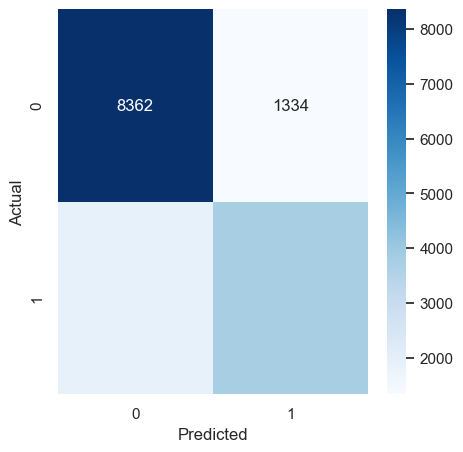

In [31]:
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(tfidf_distances_tr, y_train, model=tfidf_dist_logistic, display=False)
print(train_model)
print('\n','VALIDATION METRICS:','\n', '---'*30)
val_model = evaluate_model(tfidf_distances_va, y_val, model=tfidf_dist_logistic, display=False)
print(val_model)
print('\n','TEST','\n')
test_model = evaluate_model(tfidf_distances_va, y_val, model=tfidf_dist_logistic, display=True)

From the avilation study, it can be seen that with Tf-IDF vectorizer and distance features, the best combination is to have both features (Edit distance as well as Jaccard). It would be interesting if combining with more basic text-processing features the performance increases.

### TF-IDF with basic features

In [32]:
# loading basic features created in utils_Alba
X_tr_features = pd.read_csv('../X_tr_features.csv')
X_va_features = pd.read_csv('../X_va_features.csv')
X_te_features = pd.read_csv('../X_te_features.csv')

In [33]:
tfidf_features_tr = scipy.sparse.hstack([X_tr_q1q2, scipy.sparse.csr_matrix(X_tr_features)])
tfidf_features_va = scipy.sparse.hstack([X_va_q1q2, scipy.sparse.csr_matrix(X_va_features)])
tfidf_features_te = scipy.sparse.hstack([X_te_q1q2, scipy.sparse.csr_matrix(X_te_features)])

In [35]:
tfidf_feat_logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
tfidf_feat_logistic.fit(tfidf_features_tr, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [37]:
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(tfidf_features_tr, y_train, model=tfidf_feat_logistic, display=False)
print(train_model)
print('VALIDATION METRICS:','\n', '---'*30)
val_model = evaluate_model(tfidf_features_va, y_val, model=tfidf_feat_logistic, display=False)
print(val_model)

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.8228895809138155, 'roc_auc': 0.8023147830609543, 'precision': 0.779770782243131, 'recall': 0.724012304947072, 'f1': 0.7508578147891126}
VALIDATION METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7818134478942915, 'roc_auc': 0.7559100793284728, 'precision': 0.7255016559516851, 'recall': 0.6571378154226222, 'f1': 0.6896296296296296}


### TF-IDF + basic features + distances

#### Edit distance

In [42]:
# basic features + edit distance computed above
tfidf_features_edit_tr = scipy.sparse.hstack([tfidf_features_tr, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_tr))])
tfidf_features_edit_va = scipy.sparse.hstack([tfidf_features_va, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_va))])
tfidf_features_edit_te = scipy.sparse.hstack([tfidf_features_te, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_te))])

In [43]:
tfidf_feat_edit_logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
tfidf_feat_edit_logistic.fit(tfidf_features_edit_tr, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [44]:
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(tfidf_features_edit_tr, y_train, model=tfidf_feat_edit_logistic, display=False)
print(train_model)
print('VALIDATION METRICS:','\n', '---'*30)
val_model = evaluate_model(tfidf_features_edit_va, y_val, model=tfidf_feat_edit_logistic, display=False)
print(val_model)

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.8238693785821711, 'roc_auc': 0.803446535332322, 'precision': 0.7809715262984188, 'recall': 0.7257223580144797, 'f1': 0.7523339724258862}
VALIDATION METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7846123803944542, 'roc_auc': 0.7584207881481637, 'precision': 0.7309048178613397, 'recall': 0.6585494970884066, 'f1': 0.6928432191590087}


With edit distance it seems the performance decreases a little bit compared with basic features alone. But seems about the same without features.

#### Jaccard distance

In [47]:
# basic features + jaccard similarity computed above
tfidf_features_jaccard_tr = scipy.sparse.hstack([tfidf_features_tr, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_tr))])
tfidf_features_jaccard_va = scipy.sparse.hstack([tfidf_features_va, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_va))])
tfidf_features_jaccard_te = scipy.sparse.hstack([tfidf_features_te, scipy.sparse.csr_matrix(pd.DataFrame(jaccard_similarity_te))])

In [48]:
tfidf_feat_jaccard_logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
tfidf_feat_jaccard_logistic.fit(tfidf_features_jaccard_tr, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [49]:
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(tfidf_features_jaccard_tr, y_train, model=tfidf_feat_jaccard_logistic, display=False)
print(train_model)
print('VALIDATION METRICS:','\n', '---'*30)
val_model = evaluate_model(tfidf_features_jaccard_va, y_val, model=tfidf_feat_jaccard_logistic, display=False)
print(val_model)

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.8270417304734204, 'roc_auc': 0.8069295816761716, 'precision': 0.7853795033228401, 'recall': 0.7303878288831681, 'f1': 0.7568861237383465}
VALIDATION METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7910564342901777, 'roc_auc': 0.7659823701401374, 'precision': 0.7389612915775141, 'recall': 0.6703723310393507, 'f1': 0.7029977794226498}


Jaccard similarity seems a little bit better than edit alone.

#### TF-IDF + basic features + edit distance + jaccard distance

In [51]:
tfidf_features_dist_tr = scipy.sparse.hstack([tfidf_features_jaccard_tr, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_tr))])
tfidf_features_dist_va = scipy.sparse.hstack([tfidf_features_jaccard_va, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_va))])
tfidf_features_dist_te = scipy.sparse.hstack([tfidf_features_jaccard_te, scipy.sparse.csr_matrix(pd.DataFrame(edit_distances_te))])

In [52]:
tfidf_feat_dist_logistic = linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
tfidf_feat_dist_logistic.fit(tfidf_features_dist_tr, y_train)

LogisticRegression(random_state=123, solver='liblinear')

TRAIN METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.8281003230591613, 'roc_auc': 0.8082320304991921, 'precision': 0.786434015722894, 'recall': 0.7326183328841346, 'f1': 0.75857290639209}
VALIDATION METRICS: 
 ------------------------------------------------------------------------------------------
{'accuracy': 0.7908611599297012, 'roc_auc': 0.7657176798278027, 'precision': 0.7388088750486571, 'recall': 0.6698429504146814, 'f1': 0.7026376677464138}
TEST
METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7958817709621568
F1:  0.7112238649287026
Precision:  0.7494469026548672
Recall:  0.6767105044115199
ROC AUC:  0.7715082281034481

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.82      0.87      0.84     10165


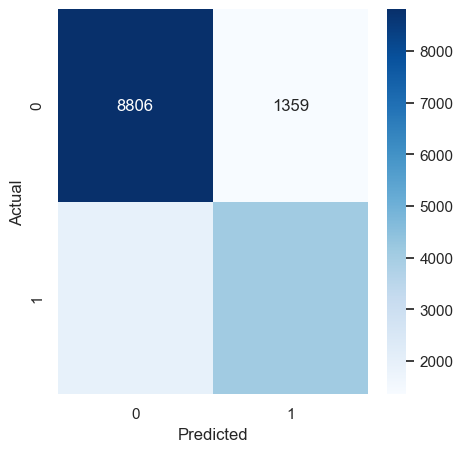

In [55]:
print('TRAIN METRICS:','\n', '---'*30)
train_model = evaluate_model(tfidf_features_dist_tr, y_train, model=tfidf_feat_dist_logistic, display=False)
print(train_model)
print('VALIDATION METRICS:','\n', '---'*30)
val_model = evaluate_model(tfidf_features_dist_va, y_val, model=tfidf_feat_dist_logistic, display=False)
print(val_model)
print('TEST')
train_model = evaluate_model(tfidf_features_dist_te, y_test, model=tfidf_feat_dist_logistic, display=True)

Having basic features + the two types of distances with a TF-IDF vectorizer seems to be the best performing model. Now it would be interesting to check with different classifiers apart from logistic

### trying different classifier models

In [56]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [57]:
# Define classifiers

rf_model = RandomForestClassifier(n_estimators=50, max_depth = 5, random_state=123)
xgb_model = XGBClassifier(random_state=123)
nb_model = MultinomialNB()

### training TF-IDF + basic features + distances

In [58]:
xgb_trained = xgb_model.fit(tfidf_features_dist_tr, y_train)
xgb_trained

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [59]:
nb_trained = nb_model.fit(tfidf_features_dist_tr, y_train)
nb_trained

MultinomialNB()

TRAINING METRICS

Results for model: XGBClassifier
{'accuracy': 0.8101282301633795, 'roc_auc': 0.7944251008910918, 'precision': 0.7462944430807575, 'recall': 0.7346629615516873, 'f1': 0.740433025323036}

Results for model: MultinomialNB
{'accuracy': 0.6985854599396363, 'roc_auc': 0.698192693699094, 'precision': 0.5752699311646753, 'recall': 0.6966979247019024, 'f1': 0.6301878861754445}

VALIDATION METRICS

Results for model: XGBClassifier
{'accuracy': 0.7930091778949424, 'roc_auc': 0.7747152395228936, 'precision': 0.7259676540069053, 'recall': 0.7049585318510676, 'f1': 0.7153088630259624}

Results for model: MultinomialNB
{'accuracy': 0.6893184924819371, 'roc_auc': 0.6859687217729183, 'precision': 0.5663598574821853, 'recall': 0.6731956943709193, 'f1': 0.6151737482867048}

TEST METRICS

Results for model: XGBClassifier
METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7945832302745486
F1:  0.7197570440357686
Precision:  0

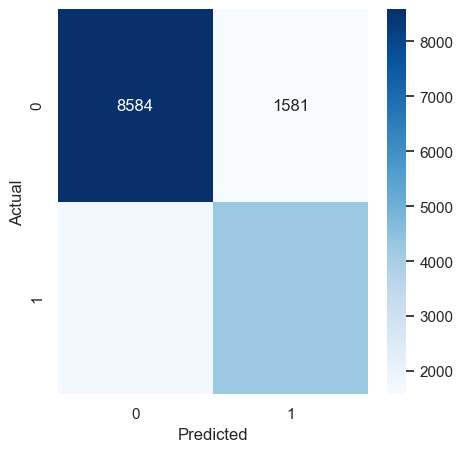

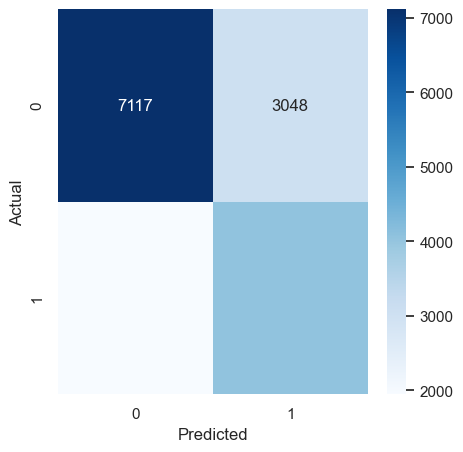

In [62]:
trained_clf = [xgb_trained, nb_trained]

# Evaluate classifiers for train
print('TRAINING METRICS')
for clf in trained_clf:
    clf_name = type(clf).__name__  # Get the class name of the classifier
    print('\nResults for model:', clf_name)
    metrics = evaluate_model(tfidf_features_dist_tr, y_train, clf, display=False)
    print(metrics)

# Evaluate classifiers for validation
print('\nVALIDATION METRICS')
for clf in trained_clf:
    clf_name = type(clf).__name__  # Get the class name of the classifier
    print('\nResults for model:', clf_name)
    metrics = evaluate_model(tfidf_features_dist_va, y_val, clf, display=False)
    print(metrics)
    
# Evaluate classifiers for test
print('\nTEST METRICS')
for clf in trained_clf:
    clf_name = type(clf).__name__  # Get the class name of the classifier
    print('\nResults for model:', clf_name)
    metrics = evaluate_model(tfidf_features_dist_te, y_test, clf, display=True)

In [63]:
from tqdm import tqdm  # Import tqdm for progress bar

# Initialize tqdm with the number of estimators (trees) to train
with tqdm(total=rf_model.n_estimators) as pbar:
    for _ in range(rf_model.n_estimators):
        rf_model.fit(tfidf_features_dist_tr, y_train)
        pbar.update(1)

# Trained model
rf_trained = rf_model
rf_trained

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [26:51<00:00, 32.23s/it]


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=123)

Not using Random Forest because it returns metrics with an error "Use `zero_division` parameter to control this behavior", but from only the accuracy we have been able to see that is not as a good classifier as XGBoost or Logistic Regressor. To our sourprise, Logistic Regressor performs the same, if not better, than XGBoost (which is one of the most commonly used classifiers), so we will use Logisitc Regressor to further comparisons with other approaches.

## Feature Hashing

The class FeatureHasher is a high-speed, low-memory vectorizer that uses a technique known as feature hashing, or the “hashing trick”. Instead of building a hash table of the features encountered in training, as the vectorizers do, instances of FeatureHasher apply a hash function to the features to determine their column index in sample matrices directly

In [66]:
questions = list(tr_df['question1']) + list(tr_df['question2'])

In [13]:
# no necessari?
q1_train =  cast_list_as_strings(list(tr_df["question1"]))
q2_train =  cast_list_as_strings(list(tr_df["question2"]))
questions = q1_train+q2_train

In [14]:
import sklearn.feature_extraction
h = sklearn.feature_extraction.FeatureHasher(input_type ='string')
#f = h.transform(questions) # to get a scipy.sparse matrix X

In [23]:
def get_features_from_df(df, featurehash):
    """
    returns a sparse matrix containing the features build by the count vectorizer.
    Each row should contain features from question1 and question2.
    """
    q1_casted =  cast_list_as_strings(list(df["question1"]))
    q2_casted =  cast_list_as_strings(list(df["question2"]))
    
    ############### Begin exercise #################
    # what is kaggle                  q1
    # What is the kaggle platform     q2
    X_q1 = featurehash.transform(q1_casted)
    X_q2 = featurehash.transform(q2_casted)    
    X_q1q2 = scipy.sparse.hstack((X_q1,X_q2))
    ############### End exercise ###################

    return X_q1q2

In [25]:
X_tr_q1q2 = get_features_from_df(tr_df, h) # it converts list as strings

In [26]:
# training a simple model
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
logistic.fit(X_tr_q1q2, y_train)

LogisticRegression(random_state=123, solver='liblinear')

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6637718099192523
F1:  0.3861088871096877
Precision:  0.5904386585809117
Recall:  0.28684281452429855
ROC AUC:  0.5853388453244179

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.68      0.88      0.77    184298
    Positive       0.59      0.29      0.39    107599

    accuracy                           0.66    291897
   macro avg       0.64      0.59      0.58    291897
weighted avg       0.65      0.66      0.63    291897

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


{'accuracy': 0.6637718099192523,
 'roc_auc': 0.5853388453244179,
 'precision': 0.5904386585809117,
 'recall': 0.28684281452429855,
 'f1': 0.3861088871096877}

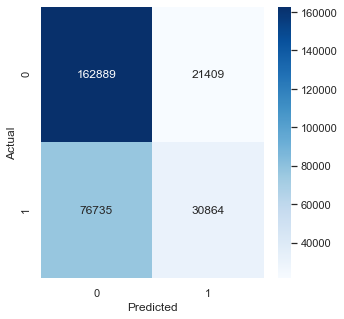

In [27]:
evaluate_model(X_tr_q1q2, y_train, model=logistic, display=True)

The performance of using hashing alone is not very good, so we have decided to not incorporate it in our model.